# **Brain Cancer - MRI**

## **Powered by 42RandomState**

**In this project, I built a deep learning model to classify brain cancer MRI images into three categories: brain glioma, brain meningioma, and brain tumor. I used MobileNetV2 as the base architecture and applied transfer learning with pre-trained ImageNet weights. I trained the model using categorical cross-entropy loss and used callbacks such as EarlyStopping and ReduceLROnPlateau to prevent overfitting and adjust the learning rate. After training, I evaluated the model’s performance using metrics like accuracy, precision, recall, confusion matrix, and ROC AUC score, achieving strong classification results.**

## **1) Analyze and work on data**

In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.metrics import Precision, Recall

dataset_dir = "/kaggle/input/brain-cancer-mri-dataset/Brain_Cancer raw MRI data/Brain_Cancer" 

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.15,          
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)
 
#SPLIT AND PREPARE THE DATA IN A TRAIN_SET AND VALIDATION_SET
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


2025-05-01 13:11:24.697977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746105084.895097      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746105084.953731      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 5149 images belonging to 3 classes.
Found 907 images belonging to 3 classes.


In [2]:
#SHAPE OF THE IMMAGE
images, labels = next(train_generator)
print("TRAIN - Shape images:", images.shape, "Shape labels:", labels.shape)
images1, labels1 = next(val_generator)
print("VALIDATION - Shape images:", images1.shape, "Shape labels:", labels1.shape)

TRAIN - Shape images: (32, 224, 224, 3) Shape labels: (32, 3)
VALIDATION - Shape images: (32, 224, 224, 3) Shape labels: (32, 3)


In [3]:
import collections
counts1 = collections.Counter(train_generator.classes)
print(f"TRAIN: {counts1}")
counts2 = collections.Counter(val_generator.classes)
print(f"VALIDATION: {counts2}")

TRAIN: Counter({2: 1741, 0: 1704, 1: 1704})
VALIDATION: Counter({2: 307, 0: 300, 1: 300})


## **2) Set the model**

In [4]:
base_model = MobileNetV2(input_shape=(224, 224, 3),include_top=False,weights='imagenet')

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


I0000 00:00:1746105104.125103      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **3) Train the model**

In [5]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(train_generator,validation_data=val_generator,epochs=25, callbacks=[early_stopping, lr_scheduler])

Epoch 1/25


I0000 00:00:1746105118.884217      71 service.cc:148] XLA service 0x7e6c8c1114b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746105118.885076      71 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746105119.872376      71 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/161 ━━━━━━━━━━━━━━━━━━━━ 44:58 17s/step - accuracy: 0.3750 - loss: 2.2638 - precision: 0.3750 - recall: 0.3750

I0000 00:00:1746105124.196361      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


161/161 ━━━━━━━━━━━━━━━━━━━━ 121s 652ms/step - accuracy: 0.7011 - loss: 0.7893 - precision: 0.7199 - recall: 0.6669 - val_accuracy: 0.9140 - val_loss: 0.2589 - val_precision: 0.9186 - val_recall: 0.9085 - learning_rate: 0.0010
Epoch 2/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 67s 399ms/step - accuracy: 0.8791 - loss: 0.3025 - precision: 0.8849 - recall: 0.8707 - val_accuracy: 0.9338 - val_loss: 0.2015 - val_precision: 0.9380 - val_recall: 0.9338 - learning_rate: 0.0010
Epoch 3/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 66s 397ms/step - accuracy: 0.8949 - loss: 0.2711 - precision: 0.9002 - recall: 0.8902 - val_accuracy: 0.9272 - val_loss: 0.2013 - val_precision: 0.9291 - val_recall: 0.9250 - learning_rate: 0.0010
Epoch 4/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 66s 397ms/step - accuracy: 0.9096 - loss: 0.2323 - precision: 0.9121 - recall: 0.9033 - val_accuracy: 0.9327 - val_loss: 0.1847 - val_precision: 0.9358 - val_recall: 0.9327 - learning_rate: 0.0010
Epoch 5/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 66s 397ms/step - accur

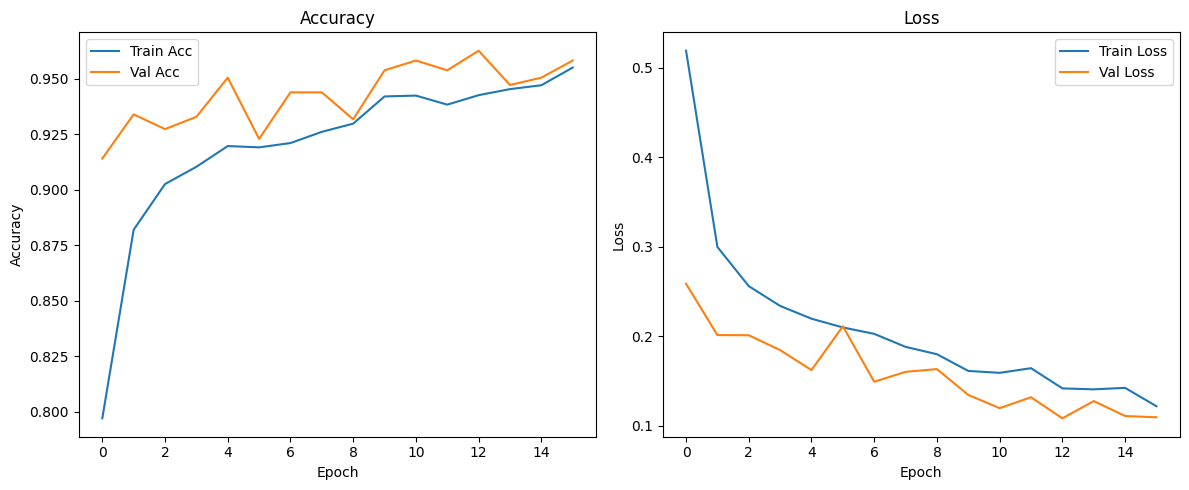

In [6]:
#PLOT TRAINING PROGRESS
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

## **4) Make the final test**

29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step
Classification Report:
               precision    recall  f1-score   support

brain_glioma       0.98      0.96      0.97       300
 brain_menin       0.93      0.95      0.94       300
 brain_tumor       0.96      0.97      0.96       307

    accuracy                           0.96       907
   macro avg       0.96      0.96      0.96       907
weighted avg       0.96      0.96      0.96       907



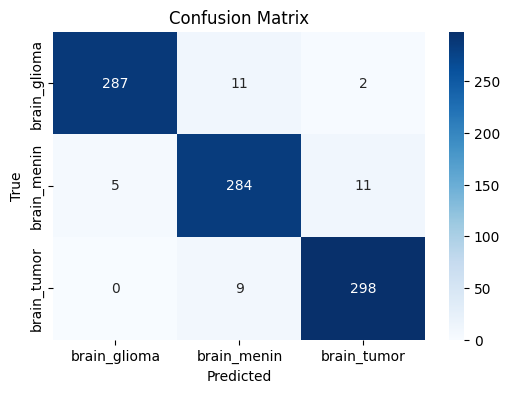

ROC AUC Score: 0.9958906764547525


In [7]:
val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

print(f"Classification Report:\n {classification_report(y_true, y_pred, target_names=class_names)}")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_true_bin, y_pred_probs, average='macro', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

## **5) Save the model**

In [8]:
model.save("brain_tumor_classifier.h5")

**We can see that we have achieved a solid model, Thank you!**